In [1]:
import numpy as np
import math
import cv2
import os

In [19]:
# Reflectance
with open('/media/liwei/Data/GCOM-C_RSRF/Rs_VN04/20220107/Rs_VN04_20220107.dat','rb') as fp:      
    SGLI_Rs_VN04 = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)
with open('/media/liwei/Data/GCOM-C_RSRF/Rs_VN04/20220107/Rs_VN04_20220107_m.dat','rb') as fp:      
    SGLI_Rs_VN04_m = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)

/tmp/ipykernel_275323/3033051944.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_Rs_VN04 = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)
/tmp/ipykernel_275323/3033051944.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_Rs_VN04_m = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)


In [ ]:
with open('/media/liwei/Data/GCOM-C_RSRF/Rs_VN04/20220107/Rs_VN04_20220107.dat','rb') as fp:      
    SGLI_Rs_VN04 = np.fromstring(fp.read(),dtype='f4').reshape(6000, 6000)

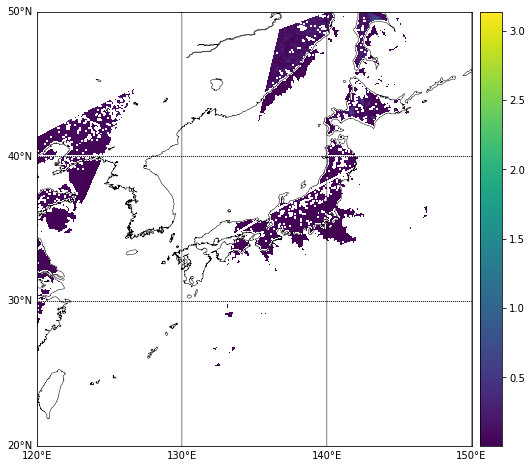

In [21]:
fig = plt.figure(figsize=(16,8))
m = Basemap(projection='cyl', resolution='i',
            llcrnrlat=20, urcrnrlat = 50,
            llcrnrlon=120, urcrnrlon = 150,
            lon_0=135, lat_0=35)                
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(20, 51, 10), labels=[1,0,0,0], fontsize=10)
m.drawmeridians(np.arange(120, 151, 10), labels=[0,0,0,1], fontsize=10)
m.imshow(SGLI_Rs_VN04,origin='upper')
cb = m.colorbar()

plt.show()
fig.savefig('map2.jpg',dpi = 1000)


In [7]:
site_name = 'Test'
Test = [120,41.875]
dellon = 0.005
dellat = 0.005
latgrid=np.linspace(Test[1]+0.05,Test[1]-0.45,20)
longrid=np.linspace(Test[0]-0.05,Test[0]+0.055,20)

In [17]:
# import AHI

with open('/media/liwei/Data/AHI_Angle/Viewer_angle/view_zM_JAPAN_05.dat','rb') as fp:
    AHI_VZA = np.fromstring(fp.read()).reshape(6000,6000)
with open('/media/liwei/Data/AHI_Angle/Viewer_angle/view_aM_JAPAN_05.dat','rb') as fp:
    AHI_VAA = np.fromstring(fp.read()).reshape(6000,6000)
    
AHI_VZA = np.flip(AHI_VZA,axis=0)[1615:1635,1990:2010]
AHI_VAA = np.flip(AHI_VAA,axis=0)[1615:1635,1990:2010]

AHI_VZA = np.mean(AHI_VZA)
AHI_VAA = np.mean(AHI_VAA)

/tmp/ipykernel_739941/395067277.py:4: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  AHI_VZA = np.fromstring(fp.read()).reshape(6000,6000)
/tmp/ipykernel_739941/395067277.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  AHI_VAA = np.fromstring(fp.read()).reshape(6000,6000)


In [29]:
row = 4000
col = 4000
dellon = 0.005
dellat = 0.005

# Global
# latgrid = np.linspace(60-dellon/2, -60+dellon/2, row)
# longrid = np.linspace(85+dellat/2, 205-dellat/2, col) 


latgrid = np.linspace(50-dellon/2, 30 + dellon/2, row)
longrid = np.linspace(110+dellat/2, 130-dellat/2, col)  

latgridrad = latgrid*math.pi/180.0
longridrad = longrid*math.pi/180.0 



view_zM = np.zeros((row,col));
view_aM = np.zeros((row,col));

for x in range(0,row):
    for y in range(0,col):
        tmpgamma = math.acos(math.cos(latgridrad[x])*math.cos(math.pi*140.7/180-longridrad[y]));
        tmpvz = math.atan((6371+35800)*math.sin(tmpgamma)/((6371+35800)*math.cos(tmpgamma)-6371));
        view_zM[x,y] = tmpvz*(180/math.pi);
        tmpva = math.asin(math.sin(140.7*math.pi/180-longridrad[y])/math.sin(tmpgamma));
        view_aM[x,y] = 180-tmpva*(180/math.pi);
        
        if latgridrad[x]<0:
            if view_aM[x,y]<=180:
                view_aM[x,y] = 180-view_aM[x,y]
            elif view_aM[x,y]>180:
                view_aM[x,y] = 360-(view_aM[x,y]-180)

In [30]:
AHI_VZA = view_zM[1615:1635,1990:2010]
AHI_VAA = view_aM[1615:1635,1990:2010]

AHI_VZA = np.mean(AHI_VZA)
AHI_VAA = np.mean(AHI_VAA)

In [31]:
def month_size(month,YYYY):
    big_month=['01','03','05','07','08','10','12']
    small_month=['04','06','09','11']
    if month in big_month:
        s = 31
    elif month in small_month:
        s = 30
    elif month == '02':
        if (int(YYYY) % 4 == 0 and int(YYYY) % 100 != 0) or int(YYYY) % 400 == 0:
            s = 29
        else:
            s = 28
    return s

In [34]:
YYYY='2019'
MM = ['04']
# DD = ['08']
# MM = ['01','02','03','04','05','06','07','08','09','10','11','12']

DD=['01','02','03','04','05','06','07','08','09','10',\
    '11','12','13','14','15','16','17','18','19','20',\
    '21','22','23','24','25','26','27','28','29','30',\
    '31']
HH=['00','01','02','03','04','05','06','07','08']
MIN=['00','10','20','30','40','50']
site_name = 'Test'
D = []
for k in range(len(MM)):
    s = month_size(MM[k],YYYY)
    for m in range(s):
        da = YYYY + MM[k] + DD[m]
        D.append(da)

In [47]:
MATCH_RESULT = []
for date in D:
#     try:
    
    # SGLI VAA

    SGLI_VAA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth_PL/{}/Sensor_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
    with open(SGLI_VAA_PL_path,'rb') as fp:
        SGLI_VAA_PL = np.fromstring(fp.read(),dtype='f4')
    SGLI_VAA_PL = np.mean(SGLI_VAA_PL)

    # SGLI VZA

    SGLI_VZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith_PL/{}/Sensor_zenith_PL_{}_{}.dat'.format(date,date,site_name)
    with open(SGLI_VZA_PL_path,'rb') as fp:
        SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4')
    SGLI_VZA_PL = np.mean(SGLI_VZA_PL)

    # SGLI SAA

    SGLI_SAA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth_PL/{}/Solar_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
    with open(SGLI_SAA_PL_path,'rb') as fp:
        SGLI_SAA_PL = np.fromstring(fp.read(),dtype='f4')
    SGLI_SAA_PL = np.mean(SGLI_SAA_PL)

    # SGLI SZA

    SGLI_SZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith_PL/{}/Solar_zenith_PL_{}_{}.dat'.format(date,date,site_name)
    with open(SGLI_SZA_PL_path,'rb') as fp:
        SGLI_SZA_PL = np.fromstring(fp.read(),dtype='f4')
    SGLI_SZA_PL = np.mean(SGLI_SZA_PL)


    SGLI_RAA_PL = abs(SGLI_SAA_PL - SGLI_VAA_PL)
    if SGLI_RAA_PL > 180:
        SGLI_RAA_PL = 360 - SGLI_RAA_PL

#     print(SGLI_VZA_PL,AHI_VZA)
    VZA_Matching_PL = abs(math.cos(math.radians(SGLI_VZA_PL)) - math.cos(math.radians(AHI_VZA)))
#     print("AHI_VZA:",AHI_VZA,"SGLI_VZA:",SGLI_VZA_PL)
#     print(VZA_Matching_PL)
    if VZA_Matching_PL < 0.02:
        print(date)
        print("AHI_VZA:",AHI_VZA,"SGLI_VZA:",SGLI_VZA_PL)
        print(VZA_Matching_PL)
        
        for h in HH:
            for minu in MIN:
                d = date + h + minu
                # AHI Solar angle     
                with open('/media/liwei/Data/AHI_Angle/Solar_zenith_angle_{}/solar_zM_{}.dat'.format(site_name,d),'rb') as fp:
                    AHI_SZA = np.fromstring(fp.read())
                with open('/media/liwei/Data/AHI_Angle/Solar_azimuth_angle_{}/solar_aM_{}.dat'.format(site_name,d),'rb') as fp:
                    AHI_SAA = np.fromstring(fp.read())

                AHI_SZA = np.mean(AHI_SZA)
                AHI_SAA = np.mean(AHI_SAA)

                AHI_RAA = abs(AHI_SAA - AHI_VAA)
#                 print(AHI_RAA,SGLI_RAA_PL)
                
                if AHI_RAA > 180:
                    AHI_RAA = 360 - AHI_RAA
#                 RAA_Matching_PL = abs(math.cos(math.radians(SGLI_RAA_PL)) - math.cos(math.radians(AHI_RAA)))
                RAA_Matching_PL = SGLI_RAA_PL - AHI_RAA
                print("AHI_RAA",AHI_RAA,"SGLI_RAA",SGLI_RAA_PL)
#                 if RAA_Matching_PL < 3:
                        
#                     MATCH_RESULT.append(d)
#                     MATCH_RESULT.append(date)
#                     print('PL')
#                     print('AHI:{}'.format(d))
#                     print('SGLI:{}'.format(date))
#                     print("AHI_RAA",AHI_RAA,"SGLI_RAA",SGLI_RAA_PL)
#                     print("AHI_VZA",AHI_VZA,"SGLI_VZA",SGLI_VZA_PL)
#                     print("AHI_SZA",AHI_SZA,"SGLI_SZA",SGLI_SZA_PL)
                        
#     except:
#         pass
    
# with open("{}_PL.txt".format(site_name),"w") as f:
#     f.writelines('\n'.join(MATCH_RESULT))            

20190401
AHI_VZA: 52.75803332287813 SGLI_VZA: 52.794785
0.0005107583337470301
AHI_RAA 40.042198722245104 SGLI_RAA 135.29102
AHI_RAA 37.88159533445277 SGLI_RAA 135.29102
AHI_RAA 35.67990284342507 SGLI_RAA 135.29102
AHI_RAA 33.433549367584575 SGLI_RAA 135.29102
AHI_RAA 31.13894562544695 SGLI_RAA 135.29102
AHI_RAA 28.7925088583586 SGLI_RAA 135.29102
AHI_RAA 26.39069739125368 SGLI_RAA 135.29102
AHI_RAA 23.93005221143082 SGLI_RAA 135.29102
AHI_RAA 21.407256305821534 SGLI_RAA 135.29102
AHI_RAA 18.81919432269251 SGLI_RAA 135.29102
AHI_RAA 16.16303907599155 SGLI_RAA 135.29102
AHI_RAA 13.436341737995548 SGLI_RAA 135.29102
AHI_RAA 10.637145254601592 SGLI_RAA 135.29102
AHI_RAA 7.764103395524302 SGLI_RAA 135.29102
AHI_RAA 4.816616982418708 SGLI_RAA 135.29102
AHI_RAA 1.7949773911548448 SGLI_RAA 135.29102
AHI_RAA 1.2994930877949855 SGLI_RAA 135.29102
AHI_RAA 4.464305977459446 SGLI_RAA 135.29102
AHI_RAA 7.695692550209287 SGLI_RAA 135.29102
AHI_RAA 10.988523436430711 SGLI_RAA 135.29102
AHI_RAA 14.3362

/tmp/ipykernel_739941/3453287552.py:9: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAA_PL = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_739941/3453287552.py:16: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_739941/3453287552.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_SAA_PL = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_739941/3453287552.py:30: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_SZA_PL = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_739941/3453287552.py:52: DeprecationWarning: The binary mode of fromstring is depr

In [37]:
AHI_VZA

52.75803332287813

In [230]:
datelist = ['201801140600',
'201804260330',
'201805300300',
'201807030230',
'201807030300',
'201808060320',
'201809090400',
'201811160610',
'201812200630']

site_name = 'TKY'
AHI_band = 'b03'
SGLI_band = 'Rs_VN08'

AHI =[]
SGLI = []
for date_AHI in datelist:
    date_SGLI = date_AHI[0:8]
    
    SGLI_SR_file = '/media/liwei/Data/GCOM-C_RSRF_Valid/{}/{}/{}_{}_{}.dat'\
    .format(SGLI_band,date_SGLI,SGLI_band,date_SGLI,site_name)
    with open(SGLI_SR_file,'rb') as fp:
        SGLI_SR = np.fromstring(fp.read(),dtype='f4')
       
    
    AHI_SR_file = '/media/liwei/Data/AHI_AC_RESULT_Validation/{}_AC/{}_{}_{}.dat'\
    .format(date_AHI,date_AHI,AHI_band,site_name)
    with open(AHI_SR_file,'rb') as fp:
        AHI_SR = np.fromstring(fp.read(),dtype='f4')
    AHI.append(AHI_SR)
    SGLI.append(SGLI_SR)
    print(date_AHI)    
    print(AHI_SR,SGLI_SR*1.1)
    

201801140600
[0.03275288] [0.38098502]
201804260330
[0.04082559] [0.055715]
201805300300
[0.89480364] [0.031845]
201807030230
[0.37337196] [0.01738]
201807030300
[0.41327044] [0.01738]
201808060320
[0.14965203] [0.0271425]
201809090400
[0.66122806] [0.0147675]
201811160610
[-0.04048553] [0.0360525]
201812200630
[-0.05986577] [0.034375]


/tmp/ipykernel_275323/1879761311.py:23: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_SR = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_275323/1879761311.py:29: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  AHI_SR = np.fromstring(fp.read(),dtype='f4')


In [209]:
MATCH_RESULT = []
VAA = []
VZA = []
name = []
site_name = 'KHW'
for date in d:
    
    try:
    
    # SGLI VAA

        SGLI_VAA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth_PL/{}/Sensor_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VAA_PL_path,'rb') as fp:
            SGLI_VAA_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)

        # SGLI VZA

        SGLI_VZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith_PL/{}/Sensor_zenith_PL_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VZA_PL_path,'rb') as fp:
            SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)
            
        
        VZA_Matching_PL = SGLI_VZA_PL[10,10] - AHI_VZA
#         print (VZA_Matching_PL)
#         if VZA_Matching_PL < 10:
#             print(date)
#             print (VZA_Matching_PL)
                
        VAA.append(math.radians(SGLI_VAA_PL[10,10]))
        VZA.append(np.nanmin(SGLI_VZA_PL))
        name.append(date)
    except:
        pass

/tmp/ipykernel_1445378/3281849852.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAA_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)
/tmp/ipykernel_1445378/3281849852.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)
/tmp/ipykernel_1445378/3281849852.py:30: RuntimeWarning: All-NaN slice encountered
  VZA.append(np.nanmin(SGLI_VZA_PL))


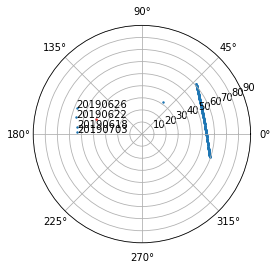

In [210]:
import matplotlib.pyplot as plt
ax1 = plt.subplot(projection='polar')
ax1.set_rlim(0,90)
ax1.scatter(VAA, VZA,s=2)
ax1.scatter(math.radians(AHI_VAA), AHI_VZA,s=2,c='r')
for i in range(len(VAA)):
    if math.degrees(VAA[i]) >135 and math.degrees(VAA[i]) < 180:
        ax1.annotate(name[i],(VAA[i],VZA[i]))
plt.show()

In [27]:
SGLI_VZA_PL = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith_PL/20190607/Sensor_zenith_PL_20190607_KHW.dat'
with open(SGLI_VZA_PL,'rb') as fp:
    SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)
    
SGLI_VAZ_PL = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth_PL/20190607/Sensor_azimuth_PL_20190607_KHW.dat'
with open(SGLI_VAZ_PL,'rb') as fp:
    SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)    


/tmp/ipykernel_1445378/3660231423.py:3: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)
/tmp/ipykernel_1445378/3660231423.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='f4').reshape(20,20)


In [153]:
for date in SGLI_VAZ_files:
    try:
        # SGLI VAZ
        SGLI_VAZ_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth/{}/Sensor_azimuth_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VAZ_path,'rb') as fp:
            SGLI_VAZ = np.fromstring(fp.read(),dtype='f4')

        SGLI_VAZ_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth_PL/{}/Sensor_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VAZ_PL_path,'rb') as fp:
            SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='f4')

        # SGLI VZA
        SGLI_VZA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith/{}/Sensor_zenith_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VZA_path,'rb') as fp:
            SGLI_VZA = np.fromstring(fp.read(),dtype='f4')

        SGLI_VZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith_PL/{}/Sensor_zenith_PL_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VZA_PL_path,'rb') as fp:
            SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4')

        # SGLI SAZ
        SGLI_SAZ_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth/{}/Solar_azimuth_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_SAZ_path,'rb') as fp:
            SGLI_SAZ = np.fromstring(fp.read(),dtype='f4')

        SGLI_SAZ_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth_PL/{}/Solar_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_SAZ_PL_path,'rb') as fp:
            SGLI_SAZ_PL = np.fromstring(fp.read(),dtype='f4')

        # SGLI SZA
        SGLI_SZA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith/{}/Solar_zenith_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_SZA_path,'rb') as fp:
            SGLI_SZA = np.fromstring(fp.read(),dtype='f4')

        SGLI_SZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith_PL/{}/Solar_zenith_PL_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_SZA_PL_path,'rb') as fp:
            SGLI_SZA_PL = np.fromstring(fp.read(),dtype='f4')
            
        print(date)
        print("LIWEI:",SGLI_VAZ,SGLI_VZA,SGLI_SAZ,SGLI_SZA)
        print("LIWEI:",SGLI_VAZ_PL,SGLI_VZA_PL,SGLI_SAZ_PL,SGLI_SZA_PL)


        # SGLI VAZ
        SGLI_VAZ_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Sensor_azimuth_{}.dat'.format(date)
        with open(SGLI_VAZ_path,'rb') as fp:
            SGLI_VAZ = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VAZ = np.where(SGLI_VAZ != -32768, SGLI_VAZ ,np.nan)
        SGLI_VAZ_ICHII = SGLI_VAZ * 0.01

        SGLI_VAZ_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Sensor_azimuth_pl_{}.dat'.format(date)
        with open(SGLI_VAZ_PL_path,'rb') as fp:
            SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VAZ_PL = np.where(SGLI_VAZ_PL != -32768, SGLI_VAZ_PL ,np.nan)
        SGLI_VAZ_PL_ICHII = SGLI_VAZ_PL * 0.01

        # SGLI VZA
        SGLI_VZA_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Sensor_zenith_{}.dat'.format(date)
        with open(SGLI_VZA_path,'rb') as fp:
            SGLI_VZA = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VZA = np.where(SGLI_VZA != -32768, SGLI_VZA ,np.nan)
        SGLI_VZA_ICHII = SGLI_VZA * 0.01        

        SGLI_VZA_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Sensor_zenith_pl_{}.dat'.format(date)
        with open(SGLI_VZA_PL_path,'rb') as fp:
            SGLI_VZA_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VZA_PL = np.where(SGLI_VZA_PL != -32768, SGLI_VZA_PL ,np.nan)
        SGLI_VZA_PL_ICHII = SGLI_VZA_PL * 0.01        

        # SGLI SAZ
        SGLI_SAZ_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Solar_azimuth_{}.dat'.format(date)
        with open(SGLI_SAZ_path,'rb') as fp:
            SGLI_SAZ = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SAZ = np.where(SGLI_SAZ != -32768, SGLI_SAZ ,np.nan)
        SGLI_SAZ_ICHII = SGLI_SAZ * 0.01     

        SGLI_SAZ_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Solar_azimuth_pl_{}.dat'.format(date)
        with open(SGLI_SAZ_PL_path,'rb') as fp:
            SGLI_SAZ_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SAZ_PL = np.where(SGLI_SAZ_PL != -32768, SGLI_SAZ_PL ,np.nan)
        SGLI_SAZ_PL_ICHII = SGLI_SAZ_PL * 0.01  

        # SGLI SZA
        SGLI_SZA_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Solar_zenith_{}.dat'.format(date)
        with open(SGLI_SZA_path,'rb') as fp:
            SGLI_SZA = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SZA = np.where(SGLI_SZA != -32768, SGLI_SZA ,np.nan)
        SGLI_SZA_ICHII = SGLI_SZA * 0.01  

        SGLI_SZA_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2018/Solar_zenith_pl_{}.dat'.format(date)
        with open(SGLI_SZA_PL_path,'rb') as fp:
            SGLI_SZA_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SZA_PL = np.where(SGLI_SZA_PL != -32768, SGLI_SZA_PL ,np.nan)
        SGLI_SZA_PL_ICHII = SGLI_SZA_PL * 0.01  





        
        print("ICHII:",SGLI_VAZ_ICHII,SGLI_VZA_ICHII,SGLI_SAZ_ICHII,SGLI_SZA_ICHII)
        print("ICHII:",SGLI_VAZ_PL_ICHII,SGLI_VZA_PL_ICHII,SGLI_SAZ_PL_ICHII,SGLI_SZA_PL_ICHII)
        print('-------------------------------------------------------')
    except:
        pass
    

/tmp/ipykernel_275323/3192430032.py:6: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAZ = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_275323/3192430032.py:10: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_275323/3192430032.py:15: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_275323/3192430032.py:19: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_275323/3192430032.py:24: DeprecationWarning: The binary mode of fromstring is deprecated

20180101
LIWEI: [nan] [nan] [nan] [nan]
LIWEI: [nan] [nan] [nan] [nan]
ICHII: nan nan nan nan
ICHII: nan nan nan nan
-------------------------------------------------------
20180106
LIWEI: [99.82] [16.92] [155.02] [61.57]
LIWEI: [99.83] [16.91] [155.03] [61.57]
ICHII: 99.82000000000001 16.91 155.04 61.58
ICHII: 99.82000000000001 16.95 155.03 61.58
-------------------------------------------------------
20180107
LIWEI: [nan] [nan] [nan] [nan]
LIWEI: [nan] [nan] [nan] [nan]
ICHII: nan nan nan nan
ICHII: nan nan nan nan
-------------------------------------------------------
20180108
LIWEI: [nan] [nan] [nan] [nan]
LIWEI: [nan] [nan] [nan] [nan]
ICHII: nan nan nan nan
ICHII: nan nan nan nan
-------------------------------------------------------
20180109
LIWEI: [-79.38] [11.48] [158.53] [60.01]
LIWEI: [-79.17] [11.49] [158.54] [60.01]
ICHII: -79.37 11.48 158.55 60.02
ICHII: -79.17 11.450000000000001 158.54 60.02
-------------------------------------------------------
20180110
LIWEI: [97.86

ICHII: -79.04 13.99 165.31 52.29
ICHII: 2.96 53.01 164.67000000000002 52.4
-------------------------------------------------------
20181108
LIWEI: [98.22] [30.88] [157.76] [54.29]
LIWEI: [35.37] [57.43] [157.15] [54.46]
ICHII: 98.22 30.88 157.77 54.29
ICHII: 35.38 57.44 157.15 54.47
-------------------------------------------------------
20181109
LIWEI: [nan] [nan] [nan] [nan]
LIWEI: [nan] [nan] [nan] [nan]
ICHII: nan nan nan nan
ICHII: nan nan nan nan
-------------------------------------------------------
20181110
LIWEI: [nan] [nan] [nan] [nan]
LIWEI: [nan] [nan] [nan] [nan]
ICHII: nan nan nan nan
ICHII: nan nan nan nan
-------------------------------------------------------
20181111
LIWEI: [-81.93] [3.67] [163.84] [53.73]
LIWEI: [10.69] [52.6] [163.23] [53.85]
ICHII: -81.93 3.67 163.84 53.730000000000004
ICHII: 10.72 52.6 163.23 53.870000000000005
-------------------------------------------------------
20181112
LIWEI: [97.32] [38.64] [156.51] [55.84]
LIWEI: [40.41] [59.94] [155.91] 

In [218]:
# SGLI VAZ


VAA = []
VZA = []
VAA_PL = []
VZA_PL = []
for date in d:
    try:

        # SGLI VAZ
        SGLI_VAZ_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Sensor_azimuth_{}.dat'.format(date)
        with open(SGLI_VAZ_path,'rb') as fp:
            SGLI_VAZ = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VAZ = np.where(SGLI_VAZ != -32768, SGLI_VAZ ,np.nan)
        SGLI_VAZ_ICHII = SGLI_VAZ * 0.01

        SGLI_VAZ_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Sensor_azimuth_pl_{}.dat'.format(date)
        with open(SGLI_VAZ_PL_path,'rb') as fp:
            SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VAZ_PL = np.where(SGLI_VAZ_PL != -32768, SGLI_VAZ_PL ,np.nan)
        SGLI_VAZ_PL_ICHII = SGLI_VAZ_PL * 0.01

        # SGLI VZA
        SGLI_VZA_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Sensor_zenith_{}.dat'.format(date)
        with open(SGLI_VZA_path,'rb') as fp:
            SGLI_VZA = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VZA = np.where(SGLI_VZA != -32768, SGLI_VZA ,np.nan)
        SGLI_VZA_ICHII = SGLI_VZA * 0.01        

        SGLI_VZA_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Sensor_zenith_pl_{}.dat'.format(date)
        with open(SGLI_VZA_PL_path,'rb') as fp:
            SGLI_VZA_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_VZA_PL = np.where(SGLI_VZA_PL != -32768, SGLI_VZA_PL ,np.nan)
        SGLI_VZA_PL_ICHII = SGLI_VZA_PL * 0.01        

        # SGLI SAZ
        SGLI_SAZ_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Solar_azimuth_{}.dat'.format(date)
        with open(SGLI_SAZ_path,'rb') as fp:
            SGLI_SAZ = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SAZ = np.where(SGLI_SAZ != -32768, SGLI_SAZ ,np.nan)
        SGLI_SAZ_ICHII = SGLI_SAZ * 0.01     

        SGLI_SAZ_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Solar_azimuth_pl_{}.dat'.format(date)
        with open(SGLI_SAZ_PL_path,'rb') as fp:
            SGLI_SAZ_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SAZ_PL = np.where(SGLI_SAZ_PL != -32768, SGLI_SAZ_PL ,np.nan)
        SGLI_SAZ_PL_ICHII = SGLI_SAZ_PL * 0.01  

        # SGLI SZA
        SGLI_SZA_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Solar_zenith_{}.dat'.format(date)
        with open(SGLI_SZA_path,'rb') as fp:
            SGLI_SZA = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SZA = np.where(SGLI_SZA != -32768, SGLI_SZA ,np.nan)
        SGLI_SZA_ICHII = SGLI_SZA * 0.01  

        SGLI_SZA_PL_path = '/media/liwei/Data/For Ichii-san/Yamashiro/2019/Solar_zenith_pl_{}.dat'.format(date)
        with open(SGLI_SZA_PL_path,'rb') as fp:
            SGLI_SZA_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
        SGLI_SZA_PL = np.where(SGLI_SZA_PL != -32768, SGLI_SZA_PL ,np.nan)
        SGLI_SZA_PL_ICHII = SGLI_SZA_PL * 0.01  
        
        
        VAA_PL.append(math.radians(SGLI_VAZ_PL_ICHII))
        VZA_PL.append(SGLI_VZA_PL_ICHII)
        VAA.append(math.radians(SGLI_VAZ_ICHII))
        VZA.append(SGLI_VZA_ICHII)
    except:
        pass
    

/tmp/ipykernel_1445378/1477247640.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAZ = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
/tmp/ipykernel_1445378/1477247640.py:20: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAZ_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
/tmp/ipykernel_1445378/1477247640.py:27: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
/tmp/ipykernel_1445378/1477247640.py:33: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA_PL = np.fromstring(fp.read(),dtype='i2').reshape(7,7)[3,3]
/tmp/ipykernel_1445378/147

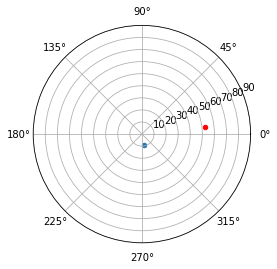

In [221]:
ax1 = plt.subplot(projection='polar')
ax1.set_rlim(0,90)
ax1.scatter(VAA[100], VZA[100],s=20)
ax1.scatter(VAA_PL[100], VZA_PL[100],s=20,c='r')
# ax1.scatter(math.radians(AHI_VAA), AHI_VZA,s=2,c='r')
plt.show()

In [182]:

YYYY='2019'
# MM = ['06']
# DD = ['03']
MM = ['01','02','03','04','05','06','07','08','09','10','11','12']

DD=['01','02','03','04','05','06','07','08','09','10',\
    '11','12','13','14','15','16','17','18','19','20',\
    '21','22','23','24','25','26','27','28','29','30',\
    '31']
d = []
for k in range(len(MM)):
    for m in range(len(DD)):
        da = YYYY + MM[k] + DD[m]
        d.append(da)

In [64]:
MATCH_RESULT = []
for date in d:
    try:
        # SGLI VAA
        SGLI_VAA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth/{}/Sensor_azimuth_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VAA_path,'rb') as fp:
            SGLI_VAA = np.fromstring(fp.read(),dtype='f4')
        SGLI_VAA = np.mean(SGLI_VAA)


        # SGLI VZA
        SGLI_VZA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith/{}/Sensor_zenith_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_VZA_path,'rb') as fp:
            SGLI_VZA = np.fromstring(fp.read(),dtype='f4')
        SGLI_VZA = np.mean(SGLI_VZA)
        
        
        
        # SGLI SAA
        SGLI_SAA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth/{}/Solar_azimuth_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_SAA_path,'rb') as fp:
            SGLI_SAA = np.fromstring(fp.read(),dtype='f4')
        SGLI_SAA = np.mean(SGLI_SAA)

        # SGLI SZA
        SGLI_SZA_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith/{}/Solar_zenith_{}_{}.dat'.format(date,date,site_name)
        with open(SGLI_SZA_path,'rb') as fp:
            SGLI_SZA = np.fromstring(fp.read(),dtype='f4')
        SGLI_SZA = np.mean(SGLI_SZA)

        
        SGLI_RAA = abs(SGLI_SAA - SGLI_VAA)
        if SGLI_RAA > 180:
            SGLI_RAA = 360 - SGLI_RAA


        for h in HH:
            for minu in MIN:
                d = date + h + minu
                # AHI Solar angle     
                with open('/media/liwei/Data/AHI_Angle/Solar_zenith_angle_{}/solar_zM_{}.dat'.format(site_name,d),'rb') as fp:
                    AHI_SZA = np.fromstring(fp.read())
                with open('/media/liwei/Data/AHI_Angle/Solar_azimuth_angle_{}/solar_aM_{}.dat'.format(site_name,d),'rb') as fp:
                    AHI_SAA = np.fromstring(fp.read())
                AHI_SZA = np.mean(AHI_SZA)
                AHI_SAA = np.mean(AHI_SAA)
                
                AHI_RAA = abs(AHI_SAA - AHI_VAA)
                if AHI_RAA > 180:
                    AHI_RAA = 360 - AHI_RAA

    #             print(AHI_RAA,SGLI_RAA,SGLI_RAA_PL)
                VZA_Matching = abs(math.cos(math.radians(SGLI_VZA)) - math.cos(math.radians(AHI_VZA)))
                print(VZA_Matching)
#                 if VZA_Matching < 0.02:
#                     print(VZA_Matching)
#                     print(d)
#                     RAA_Matching = abs(SGLI_RAA - AHI_RAA)
#                     if RAA_Matching < 5:
#                         SZA_Matching = abs(math.cos(math.radians(SGLI_SZA)) - math.cos(math.radians(AHI_SZA)))
#                         if SZA_Matching < 0.025:
#                         MATCH_RESULT.append(d)
#                         MATCH_RESULT.append(date)
#                         print('Normal')
#                         print('AHI:{}'.format(d))
#                         print('SGLI:{}'.format(date))
    except:
        pass
# with open("{}.txt".format(site_name),"w") as f:
#     f.writelines('\n'.join(MATCH_RESULT))

/tmp/ipykernel_1522728/603242524.py:7: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VAA = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_1522728/603242524.py:14: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_VZA = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_1522728/603242524.py:22: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_SAA = np.fromstring(fp.read(),dtype='f4')
/tmp/ipykernel_1522728/603242524.py:28: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  SGLI_SZA = np.fromstring(fp.read(),dtype='f4')


In [ ]:
import os
import gdal
import numpy as np
import xarray as xr
from skimage.measure import block_reduce



YYYY='2019'
MM = ['06']
# DD = [;]
DD = ['21','22','23','24','25','26','27','28']
# MM = ['01','02','03','04','05','06','07','08','09','10','11','12']
# MM = ['01','02','03','04','05','07','08','09','10','11','12']
# DD=['01','02','03','04','05','06','07','08','09','10',\
#     '11','12','13','14','15','16','17','18','19','20',\
#     '21','22','23','24','25','26','27','28','29','30',\
#     '31']


band = ['Solar_azimuth', 'Solar_zenith','Sensor_zenith', 'Sensor_azimuth', \
        'Solar_azimuth_PL', 'Solar_zenith_PL','Sensor_zenith_PL', 'Sensor_azimuth_PL']


site_name = 'Test'
YMS = [135.8462,34.7948]
TKY = [137.4231,36.1462]
KHW = [130.7095,33.1370]

Test = [120,41.875]





Test = [120,41.875]
lat_x=np.linspace(Test[1]+0.05,Test[1]-0.0475,40)
lon_y=np.linspace(Test[0]-0.05,Test[0]+0.0475,40)


for k in range(len(MM)):
    for m in range(len(DD)):
        
        date = YYYY+MM[k]+DD[m]
        print('Start {}'.format(date))
        save_tile = '/media/liwei/Data/GCOM-C_RSRF_Valid/tile/'
        save_Mosaic = '/media/liwei/Data/GCOM-C_RSRF_Valid/Mosaic/'
        save_reporjection = '/media/liwei/Data/GCOM-C_RSRF_Valid/reporjection/'
        try :
            tile_file_name = download_tile(date,save_tile)
        except :
            print( "No file {}".format(date))
            pass
        
        else:
            
            for b in band:
                if b[0] == 'R':
                    print('Start Reporjection {}'.format(b))
                    for fn in tile_file_name:
                        reporjection_IMAGE(save_tile+fn,b,save_reporjection)
                    print('Reporjection Finished!')

                    save_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/{}/{}/'.format(b,date)
                    mkdir(save_path)

                    files = os.listdir(save_reporjection)
                    files.sort()
                    files_tif = []
                    for file in files:
                        if file[-3:] == 'tif':
                            files_tif.append(save_reporjection + file)
                    for file in files_tif:
                        SGLI_2_AHI_IMAGE(file,save_path+'{}_{}_{}.dat'.format(b,date,site_name))
                    os.system('rm -f {}*'.format(save_reporjection))
                    
                else:
                    print('Start Reporjection {}'.format(b))
                    for fn in tile_file_name:
                        reporjection_GEO(save_tile+fn,b,save_reporjection)
                    print('Reporjection Finished!')

                    save_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/{}/{}/'.format(b,date)
                    mkdir(save_path)

                    files = os.listdir(save_reporjection)
                    files.sort()
                    files_tif = []
                    for file in files:
                        if file[-3:] == 'tif':
                            files_tif.append(save_reporjection + file)
#                     for file in files_tif:
#                         SGLI_2_AHI_GEO(file,save_path+'{}_{}_{}.dat'.format(b,date,site_name))
#                     os.system('rm -f {}*'.format(save_reporjection))
                
        os.system('rm -f {}*'.format(save_tile)) 
        print('{} Tile Data Deleted Finished'.format(date))

In [71]:
from ftplib import FTP
def download_AHI(target_path , date, time, angle):
    date1 = date[0:6]
    date2 = date
    AHI_date = date2 + time
    
    ftp = FTP()
    ftp.connect('hmwr829gr.cr.chiba-u.ac.jp', 21)
    ftp.login()
    
    path = '/gridded/FD/V20190123/{}/4KM/{}/'.format(date1,date2)
    ftp.cwd(path)
    
    sza_file_name = '{}.sun.zth.fld.4km.bin.bz2'.format(AHI_date)
    saa_file_name = '{}.sun.azm.fld.4km.bin.bz2'.format(AHI_date)
    
    bufsize=1024*1024
    
    if angle == 'sza':
        
        data = open(target_path + sza_file_name,'wb')
        filename='RETR '+ sza_file_name
        ftp.retrbinary(filename,data.write,bufsize)
        os.system('lbzip2 -d {}'.format(target_path + sza_file_name))
        return sza_file_name
    elif angle == 'saa':
        
        data = open(target_path + saa_file_name,'wb')
        filename='RETR '+ saa_file_name
        ftp.retrbinary(filename,data.write,bufsize)
        os.system('lbzip2 -d {}'.format(target_path + saa_file_name))
        return saa_file_name
    ftp.quit()

In [73]:
AHI_SZA_t = '/media/liwei/Data/AHI_Angle/Solar_zenith_angle'
AHI_SAA_t = '/media/liwei/Data/AHI_Angle/Solar_azimuth_angle'
angle = 'sza'

lbzip2: skipping "/media/liwei/Data/201901010000.sun.zth.fld.4km.bin.bz2": open("/media/liwei/Data/201901010000.sun.zth.fld.4km.bin"): File exists


In [69]:
MATCH_RESULT = []
for date in D:

    # Site Array
    
    
    # Download + pre-processing
    
    
    #
    
    
    
    
#     SGLI_VAA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_azimuth_PL/{}/Sensor_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
#     with open(SGLI_VAA_PL_path,'rb') as fp:
#         SGLI_VAA_PL = np.fromstring(fp.read(),dtype='f4')
#     SGLI_VAA_PL = np.mean(SGLI_VAA_PL)

#     # SGLI VZA

#     SGLI_VZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Sensor_zenith_PL/{}/Sensor_zenith_PL_{}_{}.dat'.format(date,date,site_name)
#     with open(SGLI_VZA_PL_path,'rb') as fp:
#         SGLI_VZA_PL = np.fromstring(fp.read(),dtype='f4')
#     SGLI_VZA_PL = np.mean(SGLI_VZA_PL)

#     # SGLI SAA

#     SGLI_SAA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_azimuth_PL/{}/Solar_azimuth_PL_{}_{}.dat'.format(date,date,site_name)
#     with open(SGLI_SAA_PL_path,'rb') as fp:
#         SGLI_SAA_PL = np.fromstring(fp.read(),dtype='f4')
#     SGLI_SAA_PL = np.mean(SGLI_SAA_PL)

#     # SGLI SZA

#     SGLI_SZA_PL_path = '/media/liwei/Data/GCOM-C_RSRF_Valid/Solar_zenith_PL/{}/Solar_zenith_PL_{}_{}.dat'.format(date,date,site_name)
#     with open(SGLI_SZA_PL_path,'rb') as fp:
#         SGLI_SZA_PL = np.fromstring(fp.read(),dtype='f4')
#     SGLI_SZA_PL = np.mean(SGLI_SZA_PL)







    SGLI_RAA_PL = abs(SGLI_SAA_PL - SGLI_VAA_PL)
    if SGLI_RAA_PL > 180:
        SGLI_RAA_PL = 360 - SGLI_RAA_PL

#     VZA_Matching_PL = abs(math.cos(math.radians(SGLI_VZA_PL)) - math.cos(math.radians(AHI_VZA)))



    if VZA_Matching_PL < 0.02:
        print(date)
        print("AHI_VZA:",AHI_VZA,"SGLI_VZA:",SGLI_VZA_PL)
        print(VZA_Matching_PL)
        
        for h in HH:
            for minu in MIN:
                TIME = h + minu
                
                # Download CEReS AHI Solar angle 
                file_name = download_AHI(AHI_SAA_t , date, time, 'saa')
                
                with open(AHI_SAA_t + file_name, 'wb') as fp:
                    data = np.fromstring(fp.read(),dtype='>f4').reshape(3000,3000)[site]
                    
                
                AHI_SAA = np.mean(AHI_SAA)
                
                AHI_RAA = abs(AHI_SAA - AHI_VAA)

#                 print(AHI_RAA,SGLI_RAA_PL)
                
                if AHI_RAA > 180:
                    AHI_RAA = 360 - AHI_RAA
#                 RAA_Matching_PL = abs(math.cos(math.radians(SGLI_RAA_PL)) - math.cos(math.radians(AHI_RAA)))
                RAA_Matching_PL = SGLI_RAA_PL - AHI_RAA
                print("AHI_RAA",AHI_RAA,"SGLI_RAA",SGLI_RAA_PL)
                if RAA_Matching_PL < 5:
                        
                    MATCH_RESULT.append(d)
                    MATCH_RESULT.append(date)
                    print('PL')
                    print('AHI:{}'.format(d))
                    print('SGLI:{}'.format(date))
                    print("AHI_RAA",AHI_RAA,"SGLI_RAA",SGLI_RAA_PL)
                    print("AHI_VZA",AHI_VZA,"SGLI_VZA",SGLI_VZA_PL)
                    print("AHI_SZA",AHI_SZA,"SGLI_SZA",SGLI_SZA_PL)
                        
    except:
#         pass
    
# with open("{}_PL.txt".format(site_name),"w") as f:
#     f.writelines('\n'.join(MATCH_RESULT))            

SyntaxError: invalid syntax (1504629489.py, line 90)